<a href="https://colab.research.google.com/github/HaHuyHoang19146188/BAII-TAP-AI/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout

In [ ]:
#chia tập dữ liệu thành 2 tập train và test
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#quan sát bộ data
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
#chuyển x_train,x_test từ 3 chiều thành 2 chiều
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#chuẩn hóa dữ liệu đầu vào
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255


In [ ]:
#tạo mạng noron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#chạy mạng noron
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/500
375/375 [==============================] - 5s 13ms/step - loss: 0.2246 - accuracy: 0.9242 - val_loss: 0.5508 - val_accuracy: 0.8943
Epoch 2/500
375/375 [==============================] - 5s 12ms/step - loss: 0.2182 - accuracy: 0.9247 - val_loss: 0.6375 - val_accuracy: 0.8902
Epoch 3/500
375/375 [==============================] - 5s 12ms/step - loss: 0.2173 - accuracy: 0.9277 - val_loss: 0.6386 - val_accuracy: 0.8957
Epoch 4/500
375/375 [==============================] - 5s 13ms/step - loss: 0.2127 - accuracy: 0.9266 - val_loss: 0.5940 - val_accuracy: 0.8907
Epoch 5/500
375/375 [==============================] - 5s 12ms/step - loss: 0.2143 - accuracy: 0.9270 - val_loss: 0.5847 - val_accuracy: 0.8942
Epoch 6/500
375/375 [==============================] - 5s 12ms/step - loss: 0.2052 - accuracy: 0.9289 - val_loss: 0.6318 - val_accuracy: 0.8909
Epoch 7/500
375/375 [==============================] - 5s 13ms/step - loss: 0.2098 - accuracy: 0.9272 - val_loss: 0.6771 - val_accuracy:

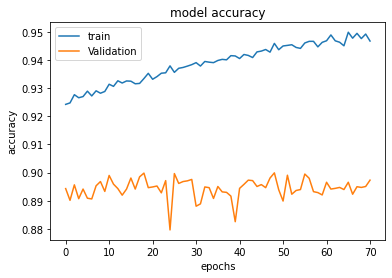

In [ ]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
#đánh giá mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.1835561990737915
Độ chính xác kiểm tra là:  0.8920000195503235
